# Workshop 3, Advanced AI - Statistics Module

Student: Ricardo Andrés Cáceres Villibord

Date: 17 de Agosto del 2023 

***Abstract***
- *In this workshop we continue learning about hypothesis testing and we start learning about measures of linear relationships.*

*Complete Workshop Instructions can be found at: https://rpubs.com/cdorante/tc3006c_w3*

### 3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

Do a t-test to check whether the mean monthly cc return of AMD (AMD) is greater than the mean monthly return of Intel. Use data from Jan 2017 to date.

In [36]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import yfinance as yf

# Get price data and select adjuste price columns
stock_prices = yf.download(tickers=['AMD','INTC'], start="2017-01-01",interval="1d")
stock_prices = stock_prices['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [40]:
# Calculate the retruns 
stock_returns = np.log(stock_prices) - np.log(stock_prices.shift(1))

# Deleting the first month with NAs
stock_returns = stock_returns.dropna()

In [43]:
# Stating the hypotheses:
# H0: (mean(returns_AMD) - mean(returns_INTEL)) = 0
# Ha: (mean(returns_AMD) - mean(returns_INTEL)) = more or less than 0

# Calculating the standard error of the difference of the means:
N = stock_returns['AMD'].count()
amd_variance = stock_returns['AMD'].var()
intel_variance = stock_returns['INTC'].var()
standardError_difference = np.sqrt((1/N) * (amd_variance + intel_variance))

# Calculating the t-Statistic:
t = (stock_returns['AMD'].mean() - stock_returns['INTC'].mean()) / standardError_difference
print('The value for t is:', round(t,5))

The value for t is: 1.24812


In [46]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amd_variance + intel_variance)**2 / ( (amd_variance/N)**2 + (intel_variance/N)**2 ) )
pvalue = 2 * st.t.sf(np.abs(t), df)
print("The p-value is: ", round(pvalue,5))

The p-value is:  0.21209


In [47]:
# Using the ttest_ind function from stats:
st.ttest_ind(stock_returns['AMD'], stock_returns['INTC'], equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

TtestResult(statistic=1.2481168948648187, pvalue=0.21209158523498106, df=2827.802941908185)

In [51]:
import researchpy as rp
# Using ttest funciton from researchpy:
rp.ttest(stock_returns['AMD'], stock_returns['INTC'], equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

C:\Users\Ricardo Caceres\AppData\Roaming\Python\Python39\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable       N      Mean        SD        SE  95% Conf.  Interval
 0       AMD  1667.0  0.001333  0.035527  0.000870  -0.000374  0.003040
 1      INTC  1667.0  0.000045  0.022643  0.000555  -0.001043  0.001133
 2  combined  3334.0  0.000689  0.029792  0.000516  -0.000323  0.001701,
          Satterthwaite t-test    results
 0  Difference (AMD - INTC) =      0.0013
 1       Degrees of freedom =   2827.8029
 2                        t =      1.2481
 3    Two side test p value =      0.2121
 4   Difference < 0 p value =      0.8940
 5   Difference > 0 p value =      0.1060
 6                Cohen's d =      0.0432
 7                Hedge's g =      0.0432
 8           Glass's delta1 =      0.0363
 9         Point-Biserial r =      0.0235)

----- 

### 4 Measures of Linear Relationship

We might be interested in learning whether there is a pattern of movement of a random variable when another random variable moves up or down. An important pattern we can measure is the linear relationship. The main two measures of linear relationship between 2 random variables are:

Covariance and

Correlation

Let’s start with an example. Imagine we want to see whether there is a relationship between the S&P500 and Microsoft stock.

The S&P500 is an index that represents the 500 biggest US companies, which is a good representation of the US financial market. We will use monthly data for the last 3-4 years.

Let’s download the price data and do the corresponding return calculation. Instead of pandas, we will use yfinance to download online data from Yahoo Finance.

In [54]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices = yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


GSPC stands for Global Standard & Poors Composite, which is the S&P500 index.

Now we will do some informative plots to start learning about the possible relationship between GSPC and MSFT.

Unfortunately, the range of stock prices and market indexes can vary a lot, so this makes difficult to compare price movements in one plot. For example, if we plot the MSFT prices and the S&P500:

<Figure size 640x480 with 0 Axes>

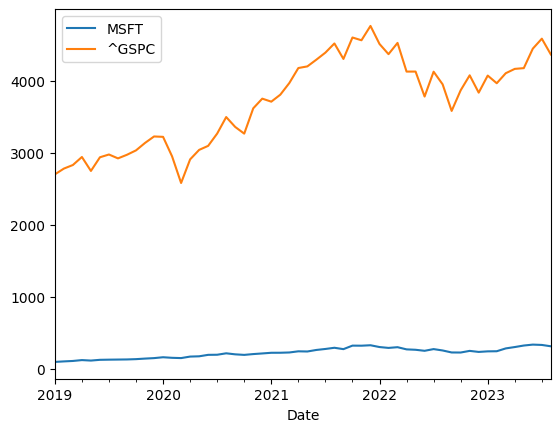

In [55]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

It looks like the GSPC has had a better performance, but this is misleading since both investment have different range of prices.

When comparing the performance of 2 or more stock prices and/or indexes, it is a good idea to generate an index for each series, so that we can emulate how much $1.00 invested in each stock/index would have moved over time. We can divide the stock price of any month by the stock price of the first month to get a growth factor:

In [56]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

This growth factor is like an index of the original variable. Now we can plot these 2 new indexes over time and see which investment was better:

<Figure size 640x480 with 0 Axes>

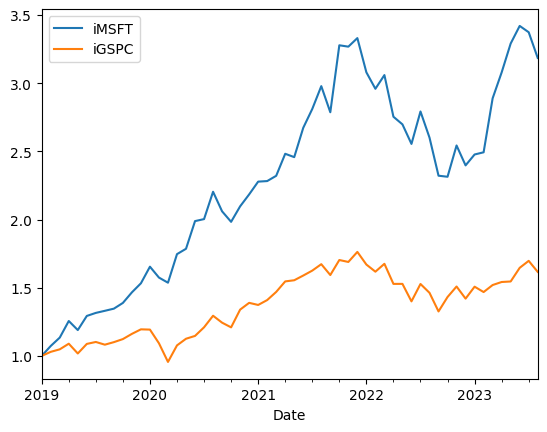

In [57]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Now we have a much better picture of which instrument has had better performance over time. The line of each instrument represents how much $1.00 invested the instrument would have been changing over time.

Now we calculate continuously compounded monthly returns. With pandas most of the data management functions works row-wise. In other words, operations are performed to all columns by row:

In [60]:
returns = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
returns = returns.dropna()
# Selecting only 2 columns (out of the 4 columns):
returns = returns[['MSFT','^GSPC']]
# Renameing the column names:
returns.columns = ['MSFT','GSPC']

Now the r dataframe will have 2 columns for both cc historical returns:

In [61]:
returns.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


To learn about the possible relationship between the GSPC and MSFT we can look at their prices and also we can look at their returns.

We start with a scatter plot to see whether there is a linear relationship between the MSFT prices and the GSPC index:

<Figure size 640x480 with 0 Axes>

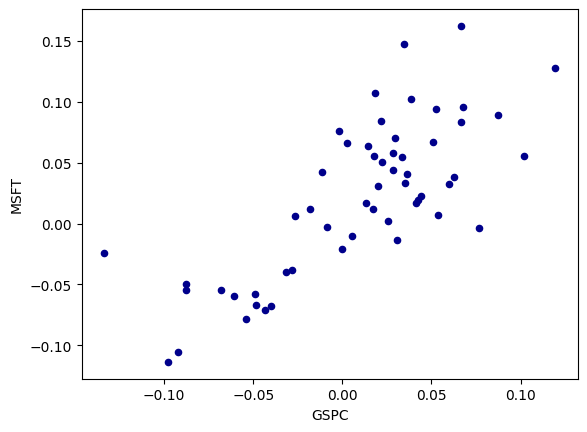

In [62]:
plt.clf()
returns.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see?

We can also do a scatter plot to visualize the relationship between the MSFT returns and GSPC returns:

<Figure size 640x480 with 0 Axes>

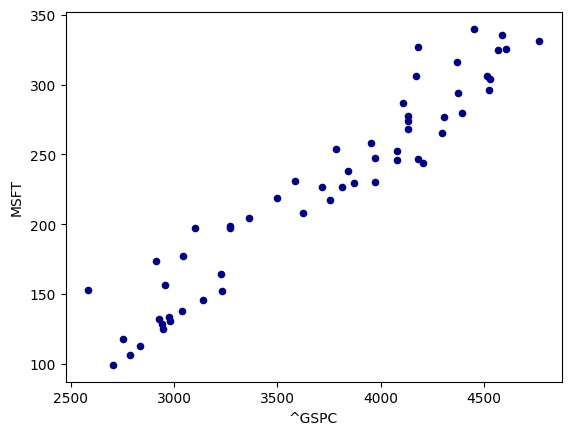

In [63]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see? Which plot conveys a stronger linear relationship?

The scatter plot using the prices conveys an apparent stronger linear relationship compared to the scatter plot using returns.

Stock returns are variables that usually does NOT grow over time; they look like a plot of heart bits:

<Figure size 640x480 with 0 Axes>

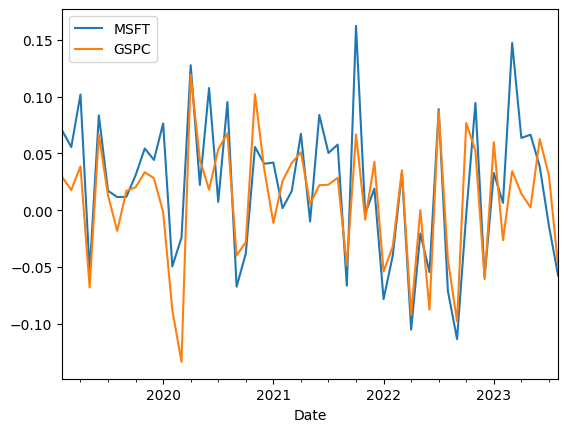

In [64]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

Stock returns behave like a stationary variable since they do not have a growing or declining trend over time. A stationary variable is a variable that has a similar average and standard deviation in any time period.

Stock prices (and indexes) are variables that usually grow over time (sooner or later). These variables are called non-stationary variables. A non-stationary variable usually changes its mean depending on the time period.

In statistics, we have to be very careful when looking at linear relationships when using non-stationary variables, like stock prices. It is very likely that we end up with spurious measures of linear relationships when we use non-stationary variables. To learn more about the risk of estimating spurious relationships, we will cover this issue in the topic of time-series regression models (covered in a more advanced module).

Then, in this case it is better to look at linear relationship between stock returns (not prices).

----

### 4.3 Calculating Covariance and Correlation

We can program the covariance of 2 variables according to the formula:

In [68]:
msft_mean = returns['MSFT'].mean()
gspc_mean = returns['GSPC'].mean()
N = returns['GSPC'].count()
sum_of_prod = ((returns['MSFT'] - msft_mean) * (returns['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
print("The covariance is: ", round(cov,7))

The covariance is:  0.0026097


Fortunately, we have the numpy function cov to calculate the covariance:

In [70]:
covm = np.cov(returns['MSFT'], returns['GSPC'])
covm

array([[0.00400567, 0.00260971],
       [0.00260971, 0.00288617]])

The cov function calculates the covariance matrix using both returns. We can find the covariance in the non-diagonal elements, which will be the same values since the covariance matrix is symetric.

The diagonal values have the variances of each return since the covariance of one variable with itself is actually its variance (Cov(X,X) = Var(X) ) .

Then, to extract the covariance between MSFT and GSPC returns we can extract the element in the row 1 and column 2 of the matrix:

In [71]:
cov = covm[0,1]
print("The covariance is: ", round(cov,7))

The covariance is:  0.0026097


This value is exactly the same we calculated manually.

We can use the corrcoef function of numpy to calculate the correlation matrix:

In [72]:
corr = np.corrcoef(returns['MSFT'],returns['GSPC'])
corr

array([[1.        , 0.76752793],
       [0.76752793, 1.        ]])

The correlation matrix will have +1 in its diagonal since the correlation of one variable with itself is +1. The non-diagonal value will be the actual correlation between the corresponding 2 variables (the one in the row, and the one in the column).

We could also manually calculate correlation using the previous covariance:

In [73]:
corr2 = cov / (returns['MSFT'].std() * returns['GSPC'].std())
print("The correlation is: ", round(corr2,7))

The correlation is:  0.7675279


We can use the scipy pearsonr function to calculate correlation and also the 2-tailed pvalue to see whether the correlation is statistically different than zero:

In [74]:
from scipy.stats import pearsonr
corr2 = pearsonr(returns['MSFT'], returns['GSPC'])
corr2

PearsonRResult(statistic=0.7675279348418916, pvalue=8.153464586766019e-12)

The pvalue is almost zero (2.4e-10) . MSFT and GSPC returns have a positive and very significant correlation (at the 99.9999…% confidence level).